In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
path = os.path.abspath("downloads/ml-20m/")
path

filename = os.listdir(path)
filename


['links.csv',
 'tags.csv',
 'genome-tags.csv',
 'ratings.csv',
 'README.txt',
 'genome-scores.csv',
 'movies.csv']

In [3]:
df_movie = pd.read_csv(path + "/" + filename[6] )
df_tags = pd.read_csv(path + "/" + filename[1])
df_ratings = pd.read_csv(path + "/" + filename[3])




In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [5]:
df_movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [6]:
df_movie.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [7]:
df_movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [8]:
df_tags.info()
df_tags.describe()
df_tags.isnull().any()
df_tags = df_tags.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
userId       465564 non-null int64
movieId      465564 non-null int64
tag          465548 non-null object
timestamp    465564 non-null int64
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


In [9]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [10]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [11]:
df_ratings["rating"].any() > 5


False

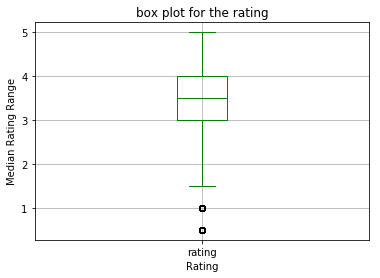

In [12]:
df_ratings["rating"].plot(kind = "box", title = "box plot for the rating", grid = True, color = 'g')
plt.ylabel("Median Rating Range")
plt.xlabel("Rating")
plt.show()


In [13]:
new_rating =df_ratings.merge(df_movie,on ="movieId", how = "inner" ).drop_duplicates()
#new_rating = new_rating.sort_values(by ='rating', ascending = False)


In [14]:
new_rating_filter = np.logical_and(new_rating["rating"]>1, new_rating["rating"]<=5)
new_rating_filter

0            True
1            True
2            True
3            True
4            True
5            True
6           False
7            True
8            True
9            True
10          False
11           True
12           True
13           True
14           True
15          False
16           True
17           True
18           True
19           True
20           True
21           True
22           True
23           True
24           True
25           True
26           True
27           True
28           True
29           True
            ...  
20000233     True
20000234     True
20000235     True
20000236     True
20000237     True
20000238     True
20000239     True
20000240     True
20000241     True
20000242     True
20000243     True
20000244     True
20000245     True
20000246     True
20000247     True
20000248     True
20000249     True
20000250     True
20000251     True
20000252     True
20000253     True
20000254     True
20000255     True
20000256     True
20000257  

In [15]:
model_df=new_rating[new_rating_filter]

In [16]:
model_df["timestamp"]=pd.to_datetime(new_rating["timestamp"], unit ='s')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
(model_df["timestamp"].dtype)

dtype('<M8[ns]')

In [18]:
model_df.count()

userId       19080406
movieId      19080406
rating       19080406
timestamp    19080406
title        19080406
genres       19080406
dtype: int64

In [19]:
model_df["makeYear"]=model_df["title"].str.extract("^.*?\([^\d]*(\d+)[^\d]*\).*$")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
comedy_flter=model_df["genres"].str.contains("Comedy")


In [21]:
comedy_df =model_df[comedy_flter]
df_test = comedy_df.groupby(["title","makeYear"])["rating"].mean().reset_index().sort_values(by="makeYear")
df_test["year"] = df_test["title"].str.extract(".*\((.*)\).*", expand = True)

Text(0,0.5,'Count of Comedy movies')

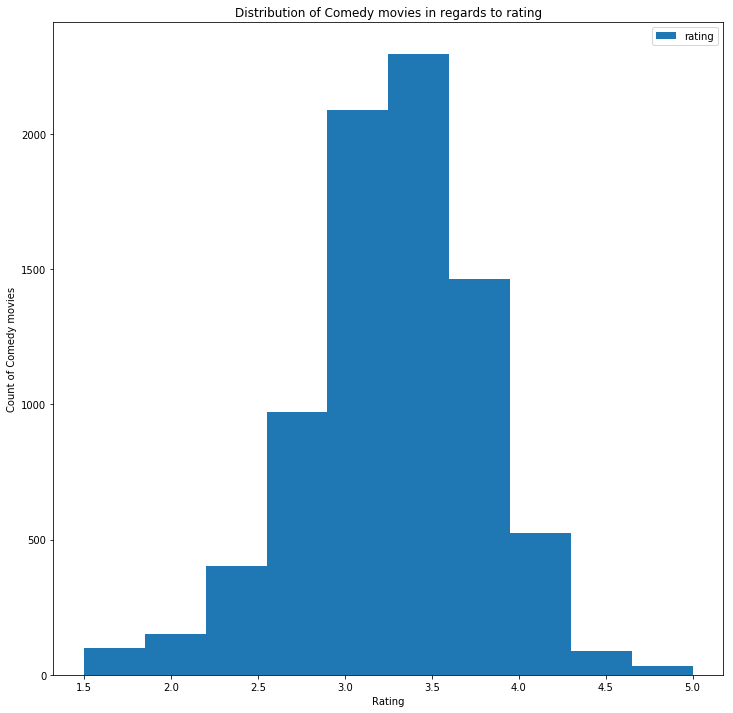

In [22]:
#Average ratings of comedy movies overtime
df_test.plot(kind="hist", figsize=(12,12), title = "Distribution of Comedy movies in regards to rating")
plt.xlabel("Rating")
plt.ylabel("Count of Comedy movies")


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8117 entries, 2512 to 1935
Data columns (total 4 columns):
title       8117 non-null object
makeYear    8117 non-null object
rating      8117 non-null float64
year        8117 non-null object
dtypes: float64(1), object(3)
memory usage: 317.1+ KB


In [24]:
df_test.isnull().any()
print(df_test.index.name)

df_test.pop("makeYear")

None


2512     008
8023      01
3488       1
4268       1
4373      10
21       101
5295      11
5289     117
5288     117
6947    1895
7095    1905
7242    1909
1188    1912
7287    1914
299     1914
2714    1914
3226    1914
4434    1914
4435    1914
1313    1915
6391    1915
5171    1915
3738    1915
618     1915
3545    1915
1143    1915
107     1915
2429    1916
6032    1916
5692    1916
        ... 
4536       3
7248       3
7258       3
4874       3
2582       3
6953      36
2534       4
328        4
324        4
2215       4
2441       4
1050       4
6305       5
323        5
4        500
322        6
7975       6
5552       6
8070      65
2185      68
85        69
1157       7
325        7
5260       7
2408       8
89         8
93       800
5838       9
94         9
1935      90
Name: makeYear, Length: 8117, dtype: object

In [27]:
df_test["year"].iloc[6565] = '2009'
df_test['year'].iloc[6147] ='2007'

df_test["year"]= pd.to_numeric(df_test.year)

df_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8117 entries, 2512 to 1935
Data columns (total 3 columns):
title     8117 non-null object
rating    8117 non-null float64
year      8117 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 253.7+ KB


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:

df_test

,title,rating,year
2512,Forbidden City Cop (Dai lap mat tam 008) (1996),3.000000,1996
8023,"Year One, The (L'an 01) (1973)",3.666667,1973
3488,Ichi the Killer (Koroshiya 1) (2001),3.597193,2001
4268,Loaded Weapon 1 (National Lampoon's Loaded Wea...,3.016301,1993
4373,"Love and Anarchy (Film d'amore e d'anarchia, o...",3.500000,1973
21,101 Reykjavik (101 Reykjavík) (2000),3.629505,2000
5295,Ocean's Eleven (a.k.a. Ocean's 11) (1960),3.610386,1960
5289,"OSS 117: Cairo, Nest of Spies (OSS 117: Le Cai...",3.693182,2006
5288,OSS 117 - Lost in Rio (OSS 117: Rio ne répond ...,3.623077,2009
6947,Tables Turned on the Gardener (1895),4.000000,1895


In [29]:
tp = df_test[["year","rating"]].groupby("year")["rating"].mean()

In [30]:
tp.reset_index().corr()

,year,rating
year,1.000000,-0.156726
rating,-0.156726,1.000000


In [31]:
tp = tp.reset_index()

In [32]:
df_map = tp.tail(16)

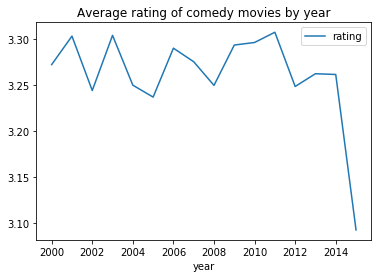

In [33]:
df_map.plot(x='year',y='rating', title = "Average rating of comedy movies by year")

In [34]:
#model_df[comedy_flter]
df_test1 = model_df.groupby(["title","genres"])["rating"].mean().reset_index().sort_values(by="rating")
df_test1["year"] = df_test1["title"].str.extract(".*\((.*)\).*", expand = True)

In [52]:
df_test1["genres"] = df_test1["genres"].str.split("|",expand = True)
df_test1.drop_duplicates()
df_test1.isnull().any()
df_test1= df_test1.dropna()
df_test1.info()
df_graph=df_test1.groupby(["genres"], as_index = False)["rating"].mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26332 entries, 26348 to 14831
Data columns (total 4 columns):
title     26332 non-null object
genres    26332 non-null object
rating    26332 non-null float64
year      26332 non-null object
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


TypeError: 'AxesSubplot' object is not subscriptable

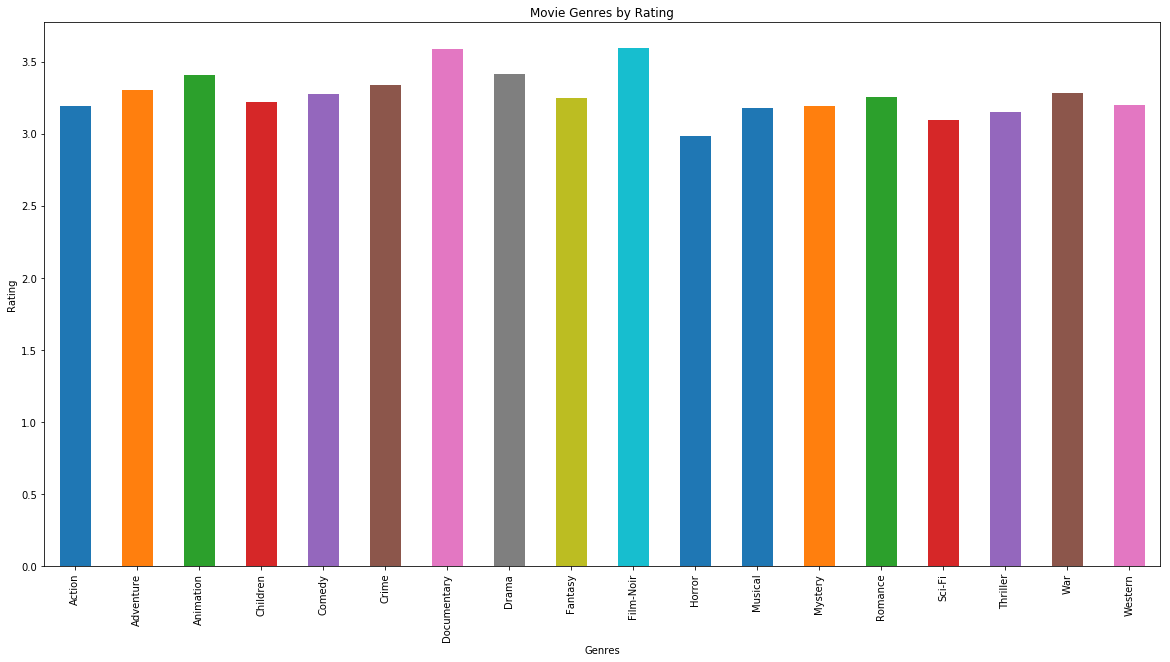

In [84]:
df_graph

graph_bar=df_graph["rating"].plot(kind="bar", figsize=(20,10))
labels = [i.get_text() for i in graph_bar.get_xticklabels()]
for i in range(len(labels)):
    labels[i] = df_graph["genres"]
    graph_bar.set_xticklabels(labels[i])

plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Movie Genres by Rating")
